Exploring how adaptation can be imitated by recurrent synapses

In [2]:
import nengo

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def stim_func(t):
    if t < 0.5:
        return 0.3
    elif 1.0 < t < 1.5:
        return 0.3
    else:
        return -0.3

In [4]:
ens_params = dict(encoders=[[1], [1], [-1], [-1]], intercepts=[-0.5, -0.1, -0.1, -0.5], max_rates=[250, 300, 300, 250])

In [133]:
with nengo.Network() as model:
    stim = nengo.Node(stim_func)
    ens = nengo.Ensemble(4, 1, neuron_type=nengo.LIFRate(), **ens_params)
    
    nengo.Connection(stim, ens)
    
    p_spikes = nengo.Probe(ens.neurons)

In [134]:
with nengo.Simulator(model) as sim:
    sim.run(1)

Building finished in 0:00:01.                                                                                
Simulating finished in 0:00:01.                                                                              


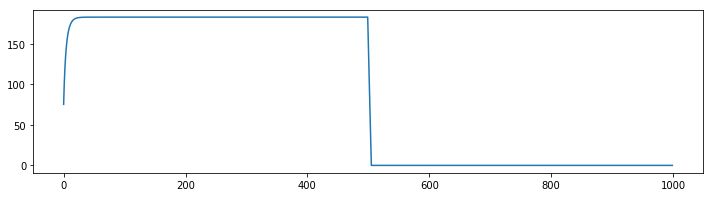

In [135]:
plt.figure(figsize=(12, 3))
plt.plot(sim.data[p_spikes][:, 1])

In [148]:
with nengo.Network() as model:
    stim = nengo.Node(stim_func)
    ens = nengo.Ensemble(4, 1, neuron_type=nengo.AdaptiveLIFRate(100, 0.1,), **ens_params)
    
    nengo.Connection(stim, ens)
    
    p_spikes = nengo.Probe(ens.neurons)

In [149]:
with nengo.Simulator(model) as sim:
    sim.run(5)

Building finished in 0:00:01.                                                                                
Simulating finished in 0:00:01.                                                                              


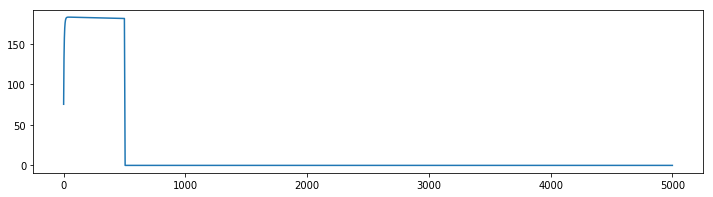

In [150]:
plt.figure(figsize=(12, 3))
plt.plot(sim.data[p_spikes][:, 1])

In [30]:
with nengo.Network() as model:
    stim = nengo.Node(stim_func)
    ens = nengo.Ensemble(4, 1, neuron_type=nengo.LIFRate(), **ens_params)
    
    nengo.Connection(stim, ens)
    nengo.Connection(ens.neurons, ens.neurons, transform=-2e-4*np.eye(4), synapse=0.5)
    
    p_spikes = nengo.Probe(ens.neurons)

In [31]:
with nengo.Simulator(model) as sim:
    sim.run(5)

Building finished in 0:00:01.                                                                                
Simulating finished in 0:00:01.                                                                              


(100, 200)

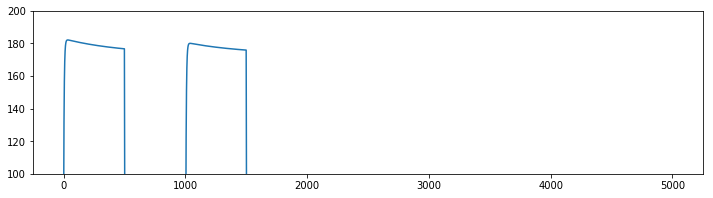

In [32]:
plt.figure(figsize=(12, 3))
plt.plot(sim.data[p_spikes][:, 1])
plt.ylim(100,200)